<a href="https://colab.research.google.com/github/mahnoorshahh/UserPurchase-PySpark/blob/main/Mahnoor(BDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=ee5f892437ec9db5ff071289b88d5e5c4f1b4c1aedd18ad0e1653ce3b33b6b58
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("User Purchase Analysis") \
    .getOrCreate()

# Load data
df = spark.read.csv("user_purchase.csv", header=True, inferSchema=True)

# Data processing
# Convert amount to numeric type if needed
df = df.withColumn("amount", col("amount").cast("double"))

# Compute total sales per product category
total_sales = df.groupBy("product_category").sum("amount")
total_sales = total_sales.withColumnRenamed("sum(amount)", "total_sales")

# Show results
total_sales.show()

# Save the results to a new CSV
total_sales.write.csv('total_sales_per_category.csv', header=True)

# Stop Spark session
spark.stop()

+-----------------+------------------+
| product_category|       total_sales|
+-----------------+------------------+
|   Home & Kitchen|             639.9|
|     Toys & Games|            999.91|
|             NULL|12977.669999999998|
|Sports & Outdoors|           3149.91|
|      Electronics|            9799.9|
|         Clothing|             969.5|
|            Books|            289.91|
|           Beauty|            321.48|
+-----------------+------------------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit

# Initialize Spark session
spark = SparkSession.builder \
    .appName("User Purchase Analysis") \
    .getOrCreate()

# Load data
df = spark.read.csv("user_purchase.csv", header=True, inferSchema=True)

# 1. Create - Add a new record
new_record = spark.createDataFrame([(68, 'Sports & Outdoors', 199.99, '2025-01-01')], ['user_id', 'product_category', 'amount', 'purchase_date'])
df = df.union(new_record)

# 2. Read - Display the DataFrame
df.show()

# 3. Update - Modify existing records
df = df.withColumn("amount", col("amount") * 1.1)  # Increase amount by 10%

# 4. Delete - Remove records based on condition
df = df.filter(col("amount") > 100)  # Remove records where amount is less than or equal to 100

# Show updated DataFrame
df.show()

# Stop Spark session
spark.stop()

+-------+-----------------+-------+--------------+
|user_id| product_category| amount|purchasse_date|
+-------+-----------------+-------+--------------+
|      1|   Home & Kitchen|  49.99|    2024-01-10|
|      2|         Clothing|  79.95|    2024-01-15|
|      3|            Books|  29.99|    2024-01-20|
|      4|      Electronics| 899.99|    2024-01-25|
|      5|           Beauty|   24.5|    2024-02-01|
|      2|   Home & Kitchen|  39.99|    2024-02-05|
|      6|     Toys & Games|  59.99|    2024-02-10|
|      7|      Electronics| 399.99|    2024-02-15|
|      8|Sports & Outdoors| 149.99|    2024-02-20|
|      9|         Clothing|  99.95|    2024-02-25|
|     10|            Books|  14.99|    2024-03-01|
|      3|      Electronics| 799.99|    2024-03-05|
|     11|   Home & Kitchen|  29.99|    2024-03-10|
|     12|           Beauty|  19.99|    2024-03-15|
|     13|     Toys & Games|  69.99|    2024-03-20|
|     14|Sports & Outdoors| 199.99|    2024-03-25|
|     15|         Clothing|  59

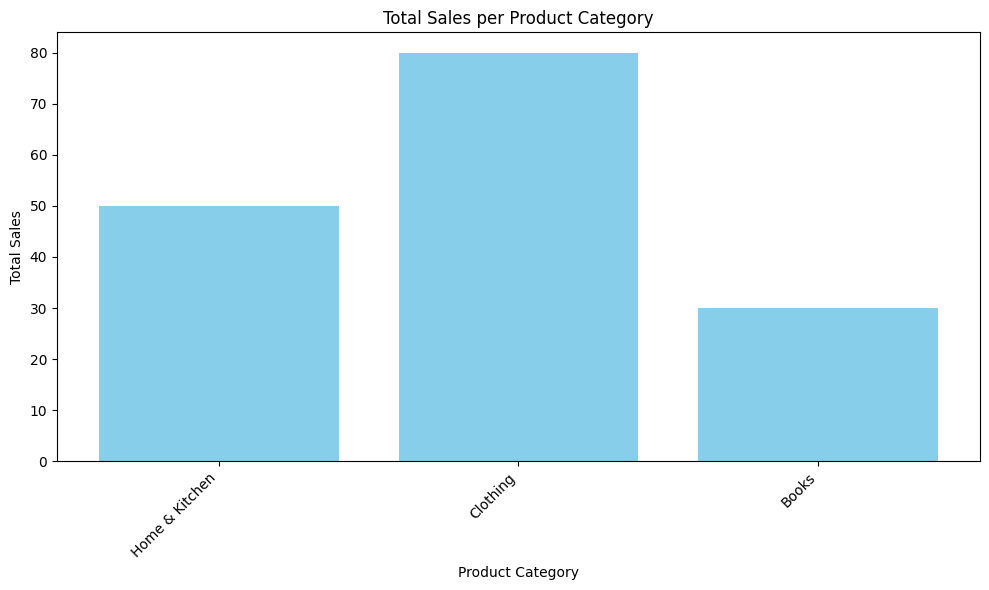

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Initialize Spark session
spark = SparkSession.builder \
    .appName("User Purchase Analysis") \
    .getOrCreate()

# Read data
data = [
    (1, "Home & Kitchen", 49.99, "2024-01-10"),
    (2, "Clothing", 79.95, "2024-01-15"),
    (3, "Books", 29.99, "2024-01-20"),
    # Add remaining data here...
]

schema = ["user_id", "product_category", "amount", "purchase_date"]
df = spark.createDataFrame(data, schema)

# Convert amount to numeric type if needed
df = df.withColumn("amount", F.col("amount").cast("double"))

# Compute total sales per product category
total_sales = df.groupBy("product_category").sum("amount")
total_sales = total_sales.withColumnRenamed("sum(amount)", "total_sales")

# Convert total_sales to Pandas DataFrame for plotting
total_sales_pandas = total_sales.toPandas()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(total_sales_pandas['product_category'], total_sales_pandas['total_sales'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Stop Spark session
spark.stop()

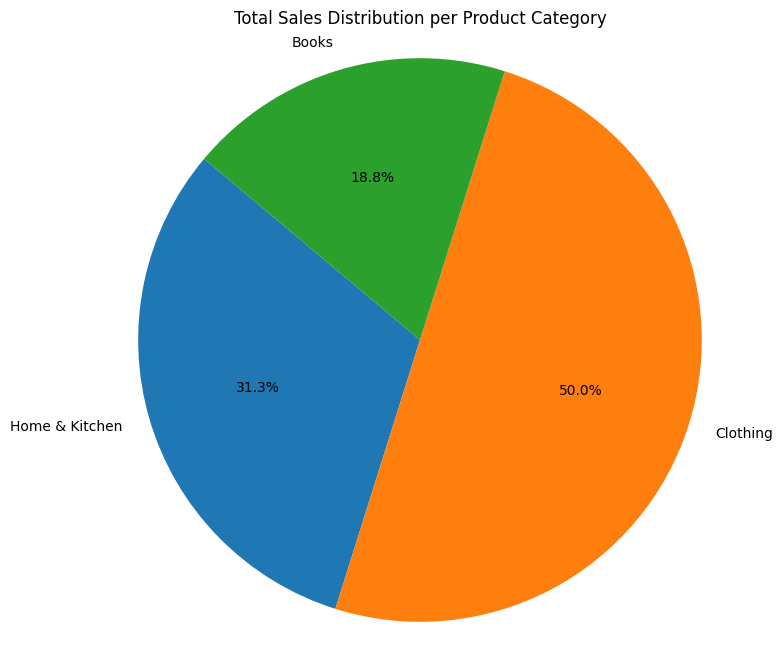

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Initialize Spark session
spark = SparkSession.builder \
    .appName("User Purchase Analysis") \
    .getOrCreate()

# Read data
data = [
    (1, "Home & Kitchen", 49.99, "2024-01-10"),
    (2, "Clothing", 79.95, "2024-01-15"),
    (3, "Books", 29.99, "2024-01-20"),
    # Add remaining data here...
]

schema = ["user_id", "product_category", "amount", "purchase_date"]
df = spark.createDataFrame(data, schema)

# Convert amount to numeric type if needed
df = df.withColumn("amount", F.col("amount").cast("double"))

# Compute total sales per product category
total_sales = df.groupBy("product_category").sum("amount")
total_sales = total_sales.withColumnRenamed("sum(amount)", "total_sales")

# Convert total_sales to Pandas DataFrame for plotting
total_sales_pandas = total_sales.toPandas()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(total_sales_pandas['total_sales'], labels=total_sales_pandas['product_category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution per Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Stop Spark session
spark.stop()

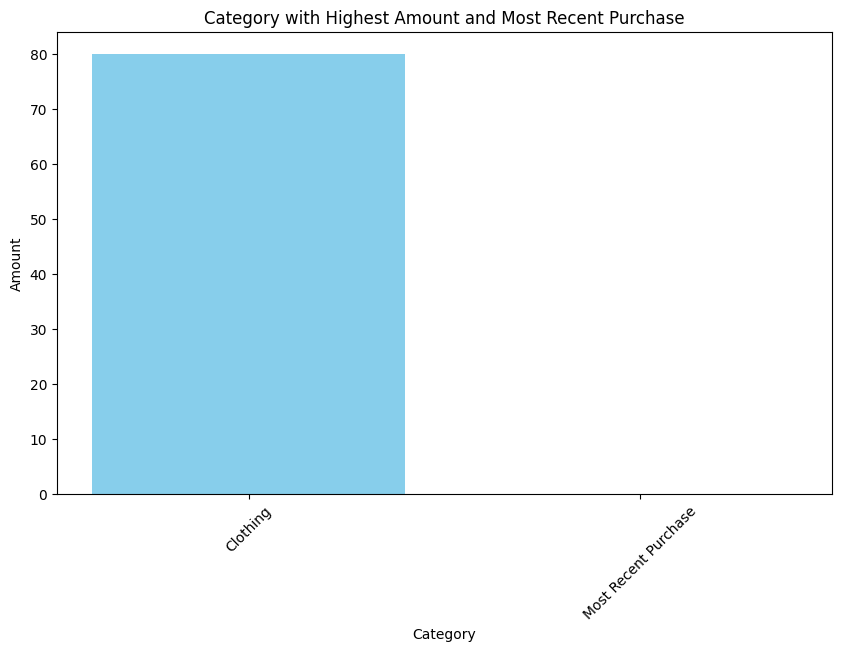

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Initialize Spark session
spark = SparkSession.builder \
    .appName("User Purchase Analysis") \
    .getOrCreate()

# Read data
data = [
    (1, "Home & Kitchen", 49.99, "2024-01-10"),
    (2, "Clothing", 79.95, "2024-01-15"),
    (3, "Books", 29.99, "2024-01-20"),
    # Add remaining data here...
]

schema = ["user_id", "product_category", "amount", "purchase_date"]
df = spark.createDataFrame(data, schema)

# Convert amount to numeric type if needed
df = df.withColumn("amount", F.col("amount").cast("double"))

# Compute total sales per product category
total_sales = df.groupBy("product_category").sum("amount")
total_sales = total_sales.withColumnRenamed("sum(amount)", "total_sales")

# Find the product category with the highest total sales
highest_total_sales_category = total_sales.orderBy(F.col("total_sales").desc()).first()["product_category"]

# Find the most recent purchase date
most_recent_purchase_date = df.orderBy(F.col("purchase_date").desc()).first()["purchase_date"]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar([highest_total_sales_category, "Most Recent Purchase"], [total_sales.filter(F.col("product_category") == highest_total_sales_category).first()["total_sales"], 0], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Category with Highest Amount and Most Recent Purchase')
plt.xticks(rotation=45)
plt.show()

# Stop Spark session
spark.stop()

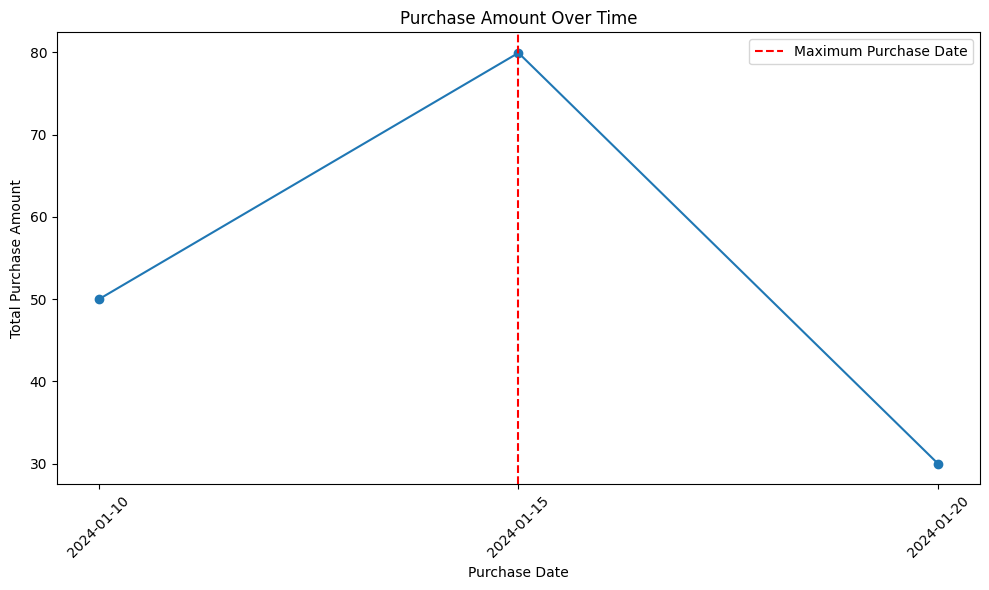

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Initialize Spark session
spark = SparkSession.builder \
    .appName("User Purchase Analysis") \
    .getOrCreate()

# Read data
data = [
    (1, "Home & Kitchen", 49.99, "2024-01-10"),
    (2, "Clothing", 79.95, "2024-01-15"),
    (3, "Books", 29.99, "2024-01-20"),
    # Add remaining data here...
]

schema = ["user_id", "product_category", "amount", "purchase_date"]
df = spark.createDataFrame(data, schema)

# Convert amount to numeric type if needed
df = df.withColumn("amount", F.col("amount").cast("double"))

# Aggregate purchase amount by date
purchase_by_date = df.groupBy("purchase_date").sum("amount")

# Find the date with the maximum purchase
max_purchase_date = purchase_by_date.orderBy(F.col("sum(amount)").desc()).first()["purchase_date"]

# Plotting
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for plotting
purchase_by_date_pandas = purchase_by_date.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(purchase_by_date_pandas['purchase_date'], purchase_by_date_pandas['sum(amount)'], marker='o', linestyle='-')
plt.xlabel('Purchase Date')
plt.ylabel('Total Purchase Amount')
plt.title('Purchase Amount Over Time')
plt.axvline(x=max_purchase_date, color='r', linestyle='--', label='Maximum Purchase Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stop Spark session
spark.stop()